In [1]:
import matplotlib
import os
os.chdir('../sim')

In [2]:
# !nrnivmodl mod/

In [3]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""

from netpyne import specs, sim
import pickle, json
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()  

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 2.0*1e2 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True

cfg.checkErrors = False

In [4]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
cfg.rootFolder = os.getcwd()

cfg.importCellMod = 'pkl' 
cfg.celldiversity = True 
cfg.poptypeNumber = 61 # max 55 + 6
cfg.celltypeNumber = 213 # max 207 + 6

In [5]:
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('../info/anatomy/S1-cells-distributions-Mouse.txt') as mtype_file:
	mtype_content = mtype_file.read()       

cfg.popNumber = {}
cfg.cellNumber = {} 
cfg.popLabel = {} 
popParam = []
cellParam = []
cfg.meParamLabels = {} 
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cfg.cellNumber[metype] = int(n)
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = int(m)

	if mtype not in popParam:
		popParam.append(mtype)
	cellParam.append(metype)

cfg.S1pops = popParam[0:55]
cfg.S1cells = cellParam[0:207]

In [6]:
#------------------------------------------------------------------------------  
# Thalamic Cells

cfg.thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cfg.cellNumber['ss_RTN_o'] = 382
cfg.cellNumber['ss_RTN_m'] = 382
cfg.cellNumber['ss_RTN_i'] = 765
cfg.cellNumber['VPL_sTC'] = 656
cfg.cellNumber['VPM_sTC'] = 839
cfg.cellNumber['POm_sTC_s1'] = 685

for mtype in cfg.thalamicpops: # No diversity for while
	metype = mtype
	popParam.append(mtype)
	cfg.popLabel[metype] = mtype
	cellParam.append(metype)

	cfg.popNumber[mtype] = cfg.cellNumber[metype]

In [7]:
#------------------------------------------------------------------------------  
cfg.popParamLabels = popParam[0:cfg.poptypeNumber] # to debug
cfg.cellParamLabels = cellParam[0:cfg.celltypeNumber] # to debug

In [8]:
subPopLabels = ['L6_TPC_L4', 'VPM_sTC']
for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:
        print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])

L6_TPC_L4_cADpyr231 312 L6_TPC_L4 312
VPM_sTC 839 VPM_sTC 839


In [9]:
#------------------------------------------------------------------------------  
cfg.S1pops = ['L6_TPC_L4']
cfg.S1cells = ['L6_TPC_L4_cADpyr231']
cfg.thalamicpops = ['VPM_sTC']

cfg.popParamLabels = subPopLabels
cfg.cellParamLabels = ['L6_TPC_L4_cADpyr231','VPM_sTC']

In [10]:
#------------------------------------------------------------------------------  
# TO DEBUG - Create only one Cell per MEtype (675 S1 cells + 6 Th cells) in mouse
cfg.oneCellperMEtype = True 
if cfg.oneCellperMEtype:
	cfg.popNumber = {}
	cfg.cellNumber = {} 
	for mtype in cfg.popParamLabels:
		cfg.popNumber[mtype] = 0

	for line in mtype_content.split('\n')[:-1]:
		metype, mtype, etype, n, m = line.split()
		if mtype in subPopLabels:
			if int(n) < 5:
				cfg.cellNumber[metype] = int(n)
				cfg.popNumber[mtype] = cfg.popNumber[mtype] + int(n)
			else:
				cfg.cellNumber[metype] = 5
				cfg.popNumber[mtype] = cfg.popNumber[mtype] + 5

	for mtype in cfg.thalamicpops:
		if mtype in subPopLabels:
			cfg.cellNumber[mtype] = 1
			cfg.popNumber[mtype] = cfg.cellNumber[mtype]

In [11]:
cfg.cellNumber

{'L6_TPC_L4_cADpyr231': 5, 'VPM_sTC': 1}

In [12]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.allpops = cfg.popParamLabels
cfg.cellsrec = 0
if cfg.cellsrec == 0:  cfg.recordCells = cfg.allpops # record all cells
elif cfg.cellsrec == 1: cfg.recordCells = [(pop,0) for pop in cfg.allpops] # record one cell of each pop

cfg.recordTraces = {'V_soma': {'sec':'soma', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.1    

In [13]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'synapses'
cfg.saveFolder = '../info/tests/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simConfig'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	

In [14]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 300.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 300.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

In [15]:
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000			 
# L23        0.198      0.089	0.286
# All     1378.8 um

cellModels = ['HH_full']
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in cfg.S1pops:
    if popName not in Epops:
        Ipops.append(popName)

Epops = []
for popName in cfg.S1pops:
    if popName not in Ipops:
        Epops.append(popName)   

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

In [16]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)(M1: 2.0 ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)(M1: 500.0um/ms)
netParams.scaleConnWeight = 0.001 # weight conversion factor (from nS to uS)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [17]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
## S1
cfg.scaleDensity = 1.0

for popName in cfg.S1pops:
	layernumber = popName[1:2]
	if layernumber == '2':
		netParams.popParams[popName] = {'cellType': popName, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': True}
	else:
		netParams.popParams[popName] = {'cellType': popName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': True}

## THALAMIC POPULATIONS (from prev model)
for popName in cfg.thalamicpops:
    if 'RTN' in popName: # inhibitory - RTN
        ThcellType = 'sRE_cell'
    else: # excitatory
        ThcellType = 'sTC_cell'    
    netParams.popParams[popName] = {'cellType': ThcellType, 'cellModel': 'HH_full', 'yRange': [ymin[popName], ymax[popName]],
                                        'numCells':  int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': False}

In [18]:
## S1 cell property rules
cellnumber = 0    
for cellName in cfg.S1cells:
    
    if cfg.cellNumber[cellName] < 5:
        morphoNumbers = cfg.cellNumber[cellName]
    else:
        morphoNumbers = 5
    
    popName = cfg.popLabel[cellName]
    cellFraction = 1.0*cfg.cellNumber[cellName]/(morphoNumbers*cfg.popNumber[popName])
    
    for morphoNumber in range(morphoNumbers):
        cellMe = cellName + '_' + str(morphoNumber+1)
        ## Load cell rules previously saved using netpyne format
        if cfg.importCellMod == 'pkl':
            netParams.loadCellParamsRule(label = cellMe, fileName = 'cell_data/' + cellMe + '/' + cellMe + '_cellParams.pkl')    
            netParams.renameCellParamsSec(label = cellMe, oldSec = 'soma_0', newSec = 'soma')

        cellRule = {'conds': {'cellType': popName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
        cellRule['secs'] = netParams.cellParams[cellMe]['secs']     
        cellRule['conds'] = netParams.cellParams[cellMe]['conds']    
        cellRule['conds']['cellType'] = popName
        cellRule['globals'] = netParams.cellParams[cellMe]['globals']       
        cellRule['secLists'] = netParams.cellParams[cellMe]['secLists']                 
        cellRule['secLists']['all'][0] = 'soma' # replace 'soma_0'
        cellRule['secLists']['somatic'][0]  = 'soma' # replace 'soma_0'
                              
        cellRule['secLists']['spiny'] = {}
        cellRule['secLists']['spinyEE'] = {}

        nonSpiny = ['axon_0', 'axon_1']
        cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
        nonSpinyEE = ['axon_0', 'axon_1', 'soma']
        cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpinyEE]

        #-----------------------------------------------------------------------------------#
        cfg.reducedtest = False    
        if cfg.reducedtest:
            cellRule['secs'] = {}
            cellRule['secs']['soma'] = netParams.cellParams[cellMe]['secs']['soma']
            # cellRule['secs']['dend_0'] = netParams.cellParams[cellMe]['secs']['dend_0']
            # cellRule['secs']['axon_0']  = netParams.cellParams[cellMe]['secs']['axon_0']
            # cellRule['secs']['axon_1'] = netParams.cellParams[cellMe]['secs']['axon_1']
            
            # if 'apic_0' in cellRule['secLists']['apical']:
            #     cellRule['secs']['apic_0']  = netParams.cellParams[cellMe]['secs']['apic_0']
            #     cellRule['secLists']['spiny'] = ['soma','dend_0','apic_0']
            #     cellRule['secLists']['spinyEE'] = ['dend_0','apic_0']
            #     cellRule['secLists']['all'] = ['soma','dend_0','apic_0','axon_0', 'axon_1']
            #     cellRule['secLists']['apical'] = ['apic_0']
            #     cellRule['secLists']['basal'] = ['dend_0']
            # else:
            #     cellRule['secLists']['spiny'] = ['soma','dend_0']
            #     cellRule['secLists']['spinyEE'] = ['dend_0']
            #     cellRule['secLists']['all'] = ['soma','dend_0','axon_0', 'axon_1']
            #     cellRule['secLists']['basal'] = ['dend_0']    

            # only soma to test the net
            cellRule['secLists']['spiny'] = ['soma']
            cellRule['secLists']['spinyEE'] = ['soma']
            cellRule['secLists']['all'] = ['soma']
            cellRule['secLists']['basal'] = ['soma']    
        #-----------------------------------------------------------------------------------#
        netParams.cellParams[cellMe] = cellRule   # add dict to list of cell params   
        cellnumber=cellnumber+1

In [19]:
## Th cell property rules
# JSON FILES FROM A1 WITH UPDATED DYNAMICS
#     # # --- VL - Exc --- #
netParams.loadCellParamsRule(label='sTC_cell', fileName='cells/sTC_jv_00.json')  # Load cellParams for each of the above cell subtype
netParams.cellParams['sTC_cell']['conds']={}

#     # --- RTN - Inh --- #
netParams.loadCellParamsRule(label='sRE_cell', fileName='cells/sRE_jv_00.json')  # Load cellParams for each of the above cell subtype
netParams.cellParams['sRE_cell']['conds']={}

In [20]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from M1 detailed
#------------------------------------------------------------------------------
## S1
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0}
netParams.synMechParams['GABAA6'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 6.44, 'e': -80}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}
netParams.synMechParams['GABAA10'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 10.4, 'e': -80}
netParams.synMechParams['GABAB'] = {'mod':'MyExp2SynBB', 'tau1': 3.5, 'tau2': 260.9, 'e': -93} 

ESynMech = ['AMPA', 'NMDA']
ISynMech = ['GABAA', 'GABAB']
ISynMech6 = ['GABAA6', 'GABAB']
ISynMech10 = ['GABAA10', 'GABAB']

## Th
netParams.synMechParams['NMDA_Th']             = {'mod': 'MyExp2SynNMDABB',    'tau1NMDA': 15, 'tau2NMDA': 150,                'e': 0}
netParams.synMechParams['AMPA_Th']             = {'mod': 'MyExp2SynBB',        'tau1': 0.05,   'tau2': 5.3, 'e': 0}
netParams.synMechParams['GABAB_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 3.5,    'tau2': 260.9,                  'e': -93} 
netParams.synMechParams['GABAA_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 0.07,   'tau2': 18.2,                   'e': -80}
netParams.synMechParams['GABAASlow_Th']        = {'mod': 'MyExp2SynBB',        'tau1': 2,      'tau2': 100,                    'e': -80}
netParams.synMechParams['GABAASlowSlow_Th']    = {'mod': 'MyExp2SynBB',        'tau1': 200,    'tau2': 400,                    'e': -80}

ESynMech_Th    = ['AMPA_Th', 'NMDA_Th']
SOMESynMech_Th = ['GABAASlow_Th','GABAB_Th']
SOMISynMech_Th = ['GABAASlow_Th']
PVSynMech_Th   = ['GABAA_Th']
NGFSynMech_Th  = ['GABAA_Th', 'GABAB_Th']

In [21]:
#------------------------------------------------------------------------------
# load data from S1 conn pre-processing file 
#------------------------------------------------------------------------------
with open('conn/conn.pkl', 'rb') as fileObj: connData = pickle.load(fileObj)

lmat = connData['lmat']
a0mat = connData['a0mat']
d0 = connData['d0']
dfinal = connData['dfinal']
pmat = {}
pmat[12.5] = connData['pmat12um']
pmat[25] = connData['pmat25um']
pmat[50] = connData['pmat50um']
pmat[75] = connData['pmat75um']
pmat[100] = connData['pmat100um']
pmat[125] = connData['pmat125um']
pmat[150] = connData['pmat150um']
pmat[175] = connData['pmat175um']
pmat[200] = connData['pmat200um'] #max value for d0=200

synperconnNumber = connData['synperconnNumber']
connNumber = connData['connNumber']
decay = connData['decay']
gsyn = connData['gsyn']
use = connData['use']

In [22]:
#------------------------------------------------------------------------------
# S1 Local connectivity parameters 
#------------------------------------------------------------------------------
##S1
cfg.addConn = True

cfg.synWeightFractionEE = [1.0, 1.0] # E -> E AMPA to NMDA ratio
cfg.synWeightFractionEI = [1.0, 1.0] # E -> I AMPA to NMDA ratio
cfg.synWeightFractionII = [1.0, 1.0]  # I -> I GABAA to GABAB ratio
cfg.synWeightFractionIE = [1.0, 1.0]  # I -> E GABAA to GABAB ratio
cfg.EEGain = 1.0
cfg.EIGain = 1.0
cfg.IIGain = 1.0
cfg.IEGain = 1.0


prob = 1.0 # test

if cfg.addConn:      
# I -> I
    for pre in Ipops:
        for post in Ipops:
            if float(connNumber[pre][post]) > 0:        
                
                if decay[pre][post] > 10.0:
                    synMechType =  ISynMech10
                elif decay[pre][post] < 7.0:
                    synMechType =  ISynMech6
                else:
                    synMechType =  ISynMech

                netParams.connParams['II_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': synMechType,
                    'probability': prob,
                    'weight': gsyn[pre][post] * cfg.IIGain, 
                    'synMechWeightFactor': cfg.synWeightFractionII,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spiny'}       
## I -> E
    for pre in Ipops:
        for post in Epops:
            if float(connNumber[pre][post]) > 0:        

                if decay[pre][post] > 10.0:
                    synMechType =  ISynMech10
                elif decay[pre][post] < 7.0:
                    synMechType =  ISynMech6
                else:
                    synMechType =  ISynMech

                netParams.connParams['IE_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': synMechType,
                    'probability': prob,
                    'weight': gsyn[pre][post] * cfg.IEGain, 
                    'synMechWeightFactor': cfg.synWeightFractionIE,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spiny'}     
## E -> E
    for pre in Epops:
        for post in Epops:
            if float(connNumber[pre][post]) > 0:  
                
                netParams.connParams['EE_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': ESynMech,
                    'probability': prob, 
                    'weight': gsyn[pre][post] * cfg.EEGain, 
                    'synMechWeightFactor': cfg.synWeightFractionEE,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spinyEE'}    
# ## E -> I
    for pre in Epops:
        for post in Ipops:
            if float(connNumber[pre][post]) > 0:        
                
                netParams.connParams['EI_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': ESynMech,
                    'probability': prob, 
                    'weight': gsyn[pre][post] * cfg.EIGain, 
                    'synMechWeightFactor': cfg.synWeightFractionEI,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spiny'}    

In [23]:
#------------------------------------------------------------------------------
# Spontaneous synapses + background - data from Rat
#------------------------------------------------------------------------------
cfg.addStimSynS1 = 1
cfg.rateStimE = 6.0
cfg.rateStimI = 9.0

#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
SourcesNumber = 5 # for each post Mtype - sec distribution
synperNeuronStimI = connData['synperNeuronStimI']
synperNeuronStimE = connData['synperNeuronStimE']
GsynStimI = connData['GsynStimI']
GsynStimE = connData['GsynStimE']
   
if cfg.addStimSynS1:      
    for post in Ipops + Epops:

        synperNeuron = synperNeuronStimI[post]
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = synperNeuronStimE[post]
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in Epops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spinyEE', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimE[post],
                'delay': 0.1, 
                'synMech': 'AMPA'}

    for post in Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spiny', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimE[post],
                'delay': 0.1, 
                'synMech': 'AMPA'}

    for post in Epops+Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spiny', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimI[post],
                'delay': 0.1, 
                'synMech': 'GABAA'}

In [24]:
#------------------------------------------------------------------------------
# Th-Th connectivity parameters
#------------------------------------------------------------------------------
cfg.connectTh = True
cfg.connect_RTN_RTN     = True
cfg.connect_TC_RTN      = True
cfg.connect_RTN_TC      = True

# parameters tuned in (simDate = '2021_04_16' / simCode = 'jv019' - 'stabilizing the Firing rates of the model')
cfg.yConnFactor             = 10 # y-tolerance form connection distance based on the x and z-plane radial tolerances (1=100%; 2=50%; 5=20%; 10=10%)
cfg.connProb_RTN_RTN        = 1.0 #None 
cfg.connWeight_RTN_RTN      = 100.0*2.0 # optimized to increase synchrony in (simDate = '2021_04_30' / simCode = 't_allpops_012') - old value: 0.5
cfg.connProb_TC_RTN         = 0.75 #None
cfg.connWeight_TC_RTN       = 100.0*1.5 #0.5
cfg.connProb_RTN_TC         = 0.75 #None
cfg.connWeight_RTN_TC       = 100.0*0.25 # optimized to increase synchrony in (simDate = '2021_04_30' / simCode = 't_allpops_013') - old value: 0.83

cfg.divergenceHO = 10
cfg.connLenghtConst = 200

if cfg.connectTh:
    ## load data from conn pre-processing file
    with open('conn/conn_Th.pkl', 'rb') as fileObj: connData = pickle.load(fileObj)
    pmat = connData['pmat']
    lmat = connData['lmat']
    wmat = connData['wmat']
    cmat = connData['cmat']
    
    pops_TC     = ['VPL_sTC','VPM_sTC', 'POm_sTC_s1']
    pops_RTN    = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i']
    pops_FO     = ['VPL_sTC','VPM_sTC']
    pops_HO     = ['POm_sTC_s1']

    # Intrathalamic 
    if cfg.connect_RTN_RTN:        
        for pre in pops_RTN:
            for post in pops_RTN:
                if pre in pmat and post in pmat[pre]:
                    if pre in cfg.thalamicpops and post in cfg.thalamicpops:
                        pmat[pre][post]=cfg.connProb_RTN_RTN
                        wmat[pre][post]=cfg.connWeight_RTN_RTN

                        l = cfg.connLenghtConst
                        syn = PVSynMech_Th # only GABA A
                        synWeightFactor = [1.0]
                        netParams.connParams['thal_'+pre+'_'+post] = { 
                                        'preConds': {'pop': pre}, 
                                        'postConds': {'pop': post},
                                        'synMech': syn,
                                        'probability':' %f * exp(-dist_3D/%f)*(dist_2D<%f)*(dist_y<(%f/%f))' % (pmat[pre][post], l, cmat[pre][post], cmat[pre][post],cfg.yConnFactor),
                                        'weight': wmat[pre][post], 
                                        'synMechWeightFactor': synWeightFactor,
                                        'delay': 'defaultDelay+dist_3D/propVelocity',
                                        'synsPerConn': 1,
                                        'sec': 'soma'}

    if cfg.connect_TC_RTN:
        for pre in pops_TC:
            for post in pops_RTN:
                if pre in pmat and post in pmat[pre]:
                    if pre in cfg.thalamicpops and post in cfg.thalamicpops:
                        pmat[pre][post]=cfg.connProb_TC_RTN
                        wmat[pre][post]=cfg.connWeight_TC_RTN

                        l = cfg.connLenghtConst
                        y_thresh    = cmat[pre][post]/5

                        syn = ['AMPA_Th'] # AMPA
                        synWeightFactor = [1.0]

                        if pre in pops_HO:
                            conn_method = 'divergence'
                            prob_rule = cfg.divergenceHO
                        else: # topographycal connectivity
                            conn_method = 'probability'
                            prob_rule = '%f * exp(-dist_2D/%f)*(dist_2D<%f)*(abs(((((pre_y-%f)*(%f-%f))/(%f-%f))+%f)-post_y)<%f)' % (pmat[pre][post], l, cmat[pre][post],ymin[pre],ymax[post],ymin[post],ymax[pre],ymin[pre],ymin[post],y_thresh)

                        netParams.connParams['thal_'+pre+'_'+post] = { 
                                    'preConds': {'pop': pre}, 
                                    'postConds': {'pop': post},
                                    'synMech': syn,
                                    conn_method:  prob_rule,
                                    'weight': wmat[pre][post], 
                                    'synMechWeightFactor': synWeightFactor,
                                    'delay': 'defaultDelay+dist_3D/propVelocity',
                                    'synsPerConn': 1,
                                    'sec': 'soma'}

    if cfg.connect_RTN_TC:
        for pre in pops_RTN:
            for post in pops_TC:
                if pre in pmat and post in pmat[pre]:
                    if pre in cfg.thalamicpops and post in cfg.thalamicpops:
                        pmat[pre][post]=cfg.connProb_RTN_TC
                        wmat[pre][post]=cfg.connWeight_RTN_TC

                        l = cfg.connLenghtConst
                        y_thresh    = cmat[pre][post]/5

                        syn = NGFSynMech_Th    # GABA A and GABA B
                        synWeightFactor = [0.6,0.4]

                        if post in pops_HO:
                            conn_method = 'divergence'
                            prob_rule = cfg.divergenceHO
                        else: # topographycal connectivity
                            conn_method = 'probability'
                            prob_rule = '%f * exp(-dist_2D/%f)*(dist_2D<%f)*(abs(((((pre_y-%f)*(%f-%f))/(%f-%f))+%f)-post_y)<%f)' % (pmat[pre][post], l, cmat[pre][post],ymin[pre],ymax[post],ymin[post],ymax[pre],ymin[pre],ymin[post],y_thresh)

                        netParams.connParams['thal_'+pre+'_'+post] = { 
                                    'preConds': {'pop': pre}, 
                                    'postConds': {'pop': post},
                                    'synMech': syn,
                                    conn_method:  prob_rule,
                                    'weight': wmat[pre][post], 
                                    'synMechWeightFactor': synWeightFactor,
                                    'delay': 'defaultDelay+dist_3D/propVelocity',
                                    'synsPerConn': 1,
                                    'sec': 'soma'}

In [25]:
#------------------------------------------------------------------------------
# Th->S1 connectivity parameters
#------------------------------------------------------------------------------
cfg.connect_Th_S1 = True
cfg.TC_S1 = {}
cfg.TC_S1['VPL_sTC'] = True
cfg.TC_S1['VPM_sTC'] = True
cfg.TC_S1['POm_sTC_s1'] = True

if cfg.connect_Th_S1:

    # mtype VPM_sTC POm_sTC_s1 nameref
    with open('../info/anatomy/convergence_Th_S1.txt') as mtype_file:
        mtype_content = mtype_file.read()       

    convergence_Th_S1 = {}
    convergence_Th_S1['VPM_sTC'] = {}
    convergence_Th_S1['VPL_sTC'] = {}
    convergence_Th_S1['POm_sTC_s1'] = {}

    for line in mtype_content.split('\n')[:-1]:
        mtype, preFO, preHO, nameref  = line.split()
        convergence_Th_S1['VPM_sTC'][mtype] = int(0.01* int(preFO)) # First Order
        convergence_Th_S1['VPL_sTC'][mtype] = int(0.01* int(preFO)) # First Order  
        convergence_Th_S1['POm_sTC_s1'][mtype] = int(0.01* int(preHO)) # High Order 

    ## Connectivity rules
    radius_cilinder = netParams.sizeX/2.0
    synapsesperconnection_Th_S1 = 9.0
    radius2D_Th_S1 = 50.0


    for pre in ['VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']:
        if pre in cfg.thalamicpops and cfg.TC_S1[pre]:
            for post in Epops+Ipops: 
                
                conn_convergence = np.ceil(convergence_Th_S1[pre][post]/synapsesperconnection_Th_S1)
                prob_conv = 1.0*(conn_convergence/cfg.popNumber[pre])*((radius_cilinder**2)/(radius2D_Th_S1**2)) # prob*(AreaS1/Area_Th_syn)  
                probability_rule = '%f if dist_2D < %f else 0.0' % (prob_conv,radius2D_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'weight': 0.72,  
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synapsesperconnection_Th_S1), 
                    'synMech': ESynMech}  

                if pre=='POm_sTC_s1':
                    netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence # non-topographycal connectivity
                else:
                    netParams.connParams['thal_'+pre+'_'+post]['probability'] = probability_rule # FO (First Order)

In [35]:
netParams.connParams

{EE_L6_TPC_L4_L6_TPC_L4: {'preConds': {'pop': 'L6_TPC_L4'}, 'postConds': {'pop': 'L6_TPC_L4'}, 'synMech': ['AMPA', 'NMDA'], 'probability': 1.0, 'weight': 0.8, 'synMechWeightFactor': [1.0, 1.0], 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 5, 'sec': 'spinyEE'}, thal_VPM_sTC_L6_TPC_L4: {'preConds': {'pop': 'VPM_sTC'}, 'postConds': {'pop': 'L6_TPC_L4'}, 'weight': 0.72, 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 9, 'synMech': ['AMPA', 'NMDA'], 'probability': '9.000000 if dist_2D < 50.000000 else 0.0'}}

## Run

In [26]:
sim.initialize(netParams = netParams, simConfig = cfg);  				# create network object and set cfg and net params
sim.net.createPops();


Start time:  2021-06-23 01:26:35.994107


In [27]:
sim.net.createCells();


Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 6 
  Done; cell creation time = 0.28 s.


In [28]:
sim.net.connectCells();

Making connections...
  Number of connections on node 0: 20 
  Number of synaptic contacts on node 0: 200 
  Done; cell connection time = 0.02 s.


In [29]:
sim.gatherData()


Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 6
  Connections: 20 (3.33 per cell)
  Synaptic contacts: 200 (33.33 per cell)


{spkt: {}, _repr_mimebundle_: {}}

In [30]:
cfg.popNumber

{'L6_TPC_L4': 5, 'VPM_sTC': 1}

Plotting connectivity matrix...


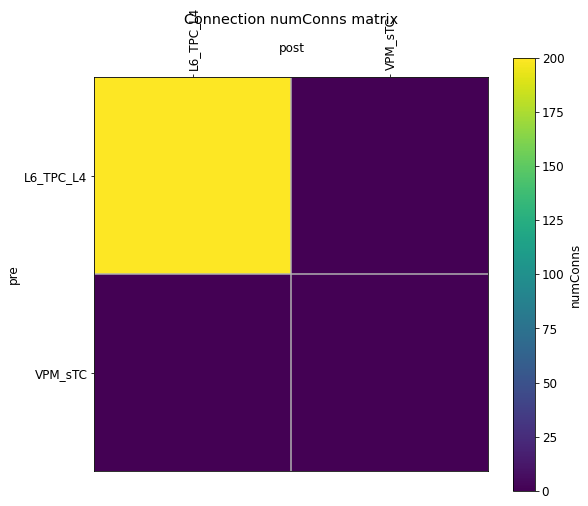

In [31]:
test = sim.analysis.plotConn(includePre=subPopLabels, includePost = subPopLabels, feature='numConns', showFig=False);

# mtype           VPL_sTC     VPM_sTC    POm_sTC_s1        nameref
# L5_TTPC2          299         299         277             L5_TT
# L5_LBC            166         166         164             L5_IN
# L6_TPC_L4         131         131         66              L6_PY
# L6_LBC             77          77         39              L6_IN

# for i in range(4):
#     print('%.1f %.1f %.1f' % (test[1]['connMatrix'][0][i],test[1]['connMatrix'][1][i],test[1]['connMatrix'][2][i]))

In [32]:
test[1]['connMatrix']

array([[200.,   0.],
       [  0.,   0.]])

Plotting 2D representation of network cell locations and connections...


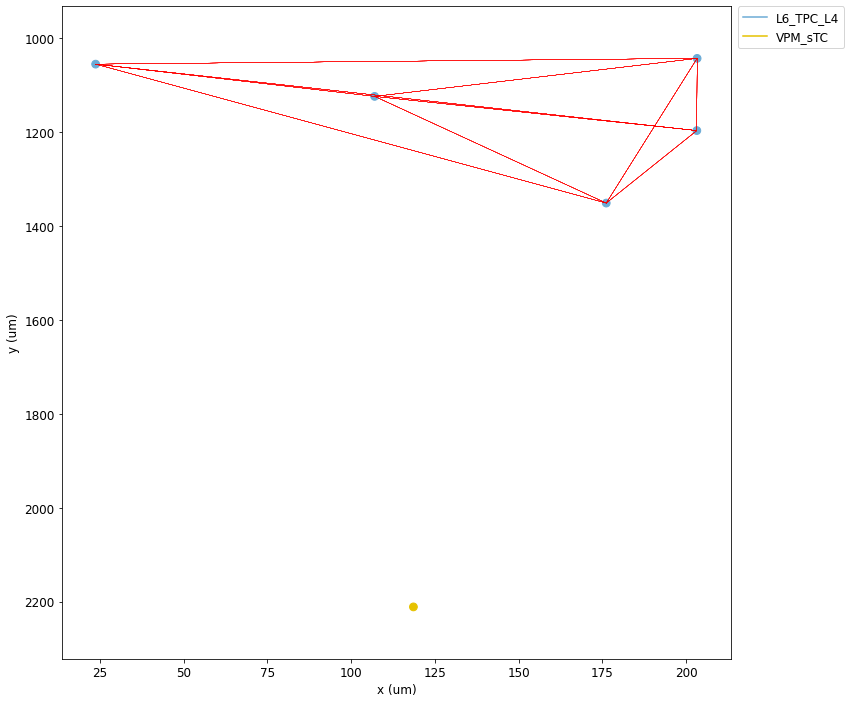

In [33]:
sim.analysis.plot2Dnet(include=subPopLabels,view='xy', showConns=True, 
                               popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);

Plotting 2D representation of network cell locations and connections...


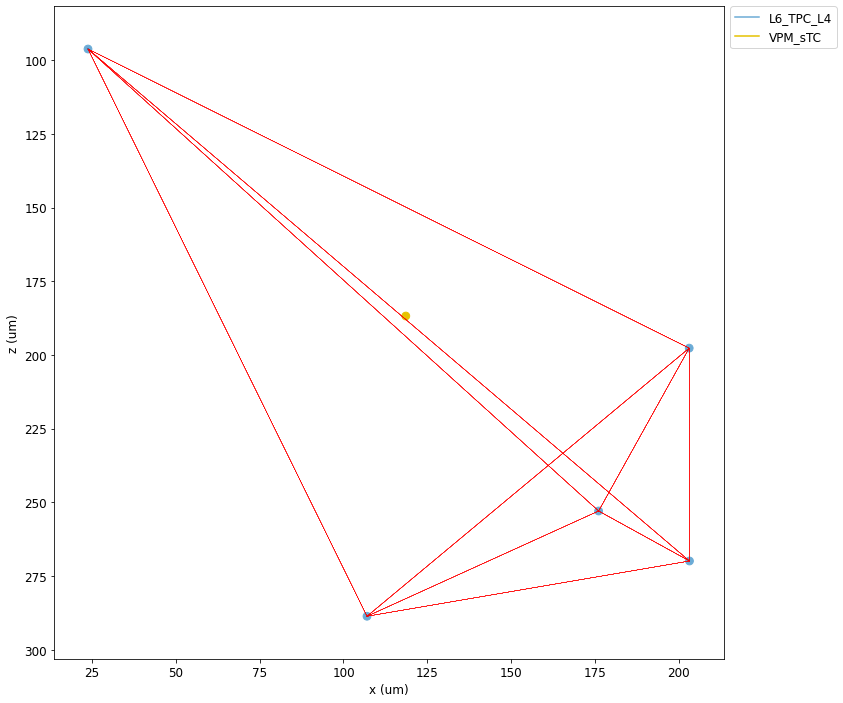

In [34]:
sim.analysis.plot2Dnet(include=subPopLabels,view='xz', showConns=True, 
                               popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);